## Mobile Price Classification

In [435]:
import pandas as pd #mengimport library pandas
import numpy as np #mengimport library numpy
import seaborn as sns #mengimport library seaborn
import matplotlib.pyplot as plt #mengimport library matplotlib.pyplot

In [436]:
df = pd.read_csv('train.csv') #mengimport data train.csv
df.head() #menampilkan 5 baris data teratas 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### Exploratory Data Analysis

In [437]:
df.info() #menampilkan informasi detail tentang dataframe, seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Penjelasan :
- battery_power : Total energy a battery can store in one time measured in mAh
- blue : Has bluetooth or not
- clock_speed : speed at which microprocessor executes instructions
- dual_sim : Has dual sim support or not
- fc : Front Camera mega pixels
- four_g : Has 4G or not
- int_memory : Internal Memory in Gigabytes
- m_dep : Mobile Depth in cm
- mobile_wt : Weight of mobile phone
- n_cores : Number of cores of processor
- pc : Primary Camera mega pixels
- px_height : Pixel Resolution Height
- px_width : Pixel Resolution Width
- ram : Random Access Memory in Mega Bytes
- sc_h : Screen Height of mobile in cm
- sc_w : Screen Width of mobile in cm
- talk_time : longest time that a single battery charge will last when you are
- three_g : Has 3G or not
- touch_screen : Has touch screen or not
- wifi : Has wifi or not
- price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [438]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [439]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

#### Data Cleansing

In [440]:
#Mengecek apakah ada value yang kosong
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Dapat dilihat pada data di atas, bahwa tidak terdapat data yang kosong atau missing value

#### Checking Outliers

In [442]:
q1 = df["battery_power"].quantile(0.25)
q3 = df["battery_power"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["battery_power"] < fence_low) | (df["battery_power"] > fence_high)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [443]:
#Mengecek outlier kolom clock_speed
q1 = df["clock_speed"].quantile(0.25)
q3 = df["clock_speed"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["clock_speed"] < fence_low) | (df["clock_speed"] > fence_high)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [444]:
#Mengecek outlier kolom int_memory
q1 = df["int_memory"].quantile(0.25)
q3 = df["int_memory"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["int_memory"] < fence_low) | (df["int_memory"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [445]:
#Mengecek outlier kolom m_dep
q1 = df["m_dep"].quantile(0.25)
q3 = df["m_dep"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["m_dep"] < fence_low) | (df["m_dep"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [446]:
#Mengecek outlier kolom mobile_wt
q1 = df["mobile_wt"].quantile(0.25)
q3 = df["mobile_wt"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["mobile_wt"] < fence_low) | (df["mobile_wt"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [447]:
#Mengecek outlier kolom n_cores
q1 = df["n_cores"].quantile(0.25)
q3 = df["n_cores"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["n_cores"] < fence_low) | (df["n_cores"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [448]:
#Mengecek outlier kolom pc
q1 = df["pc"].quantile(0.25)
q3 = df["pc"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["pc"] < fence_low) | (df["pc"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [449]:
#Mengecek outlier kolom px_width
q1 = df["px_width"].quantile(0.25)
q3 = df["px_width"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["px_width"] < fence_low) | (df["px_width"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [450]:
#Mengecek outlier kolom ram
q1 = df["ram"].quantile(0.25)
q3 = df["ram"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["ram"] < fence_low) | (df["ram"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [451]:
#Mengecek outlier kolom sc_h
q1 = df["sc_h"].quantile(0.25)
q3 = df["sc_h"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["sc_h"] < fence_low) | (df["sc_h"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [452]:
#Mengecek outlier kolom sc_w
q1 = df["sc_w"].quantile(0.25)
q3 = df["sc_w"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["sc_w"] < fence_low) | (df["sc_w"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [453]:
#Mengecek outlier kolom talk_time
q1 = df["talk_time"].quantile(0.25)
q3 = df["talk_time"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df.loc[(df["talk_time"] < fence_low) | (df["talk_time"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [454]:
#Mengecek apakah ada data yang duplikat
df.duplicated().sum()

0

#### Data Visualization

Text(0.5, 1.0, 'Correlation ')

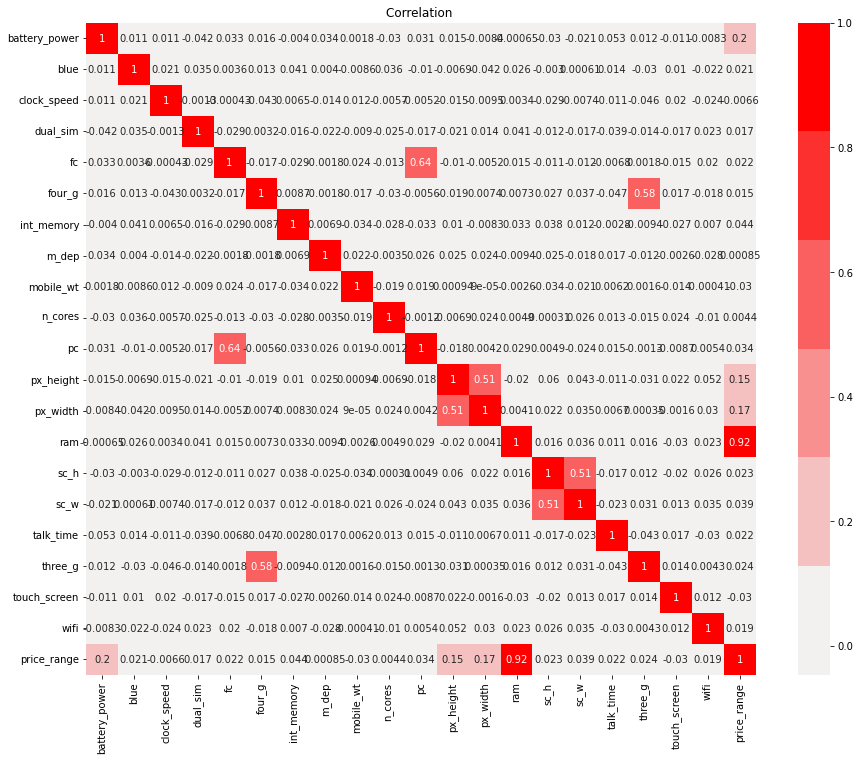

In [469]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
warna = sns.light_palette("red")
r = sns.heatmap(corr, annot=True, cmap=warna)
r.set_title("Correlation ")

price_range memiliki korelasi terhadap ram, px_width, px_height,dan battery power

<AxesSubplot:title={'center':'Checking for Outliers'}, xlabel='price_range', ylabel='ram'>

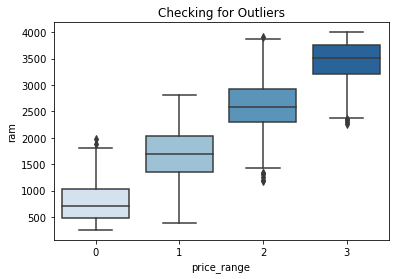

In [470]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='ram', data=df, palette="Blues")

#### Modelling 

In [473]:
# defining feature matrix(X) and response vector(y)
x = df.loc[:, df.columns != 'price_range'] #mendefinisikan x degnan memilih semua kolom kecuali kolom price_range
y = df["price_range"] #mendefinisikan y dengan kolom price-range

In [474]:
# splitting x and y into training and testing sets
from sklearn.model_selection import train_test_split #mengimport library train_test_split dari sklearn.model_selection
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1) 

- x_train : Untuk menampung data source yang akan dilatih.
- x_test : Untuk menampung data target yang akan dilatih.
- y_train : Untuk menampung data source yang akan digunakan untuk testing.
- y_test : Untuk menampung data target yang akan digunakan untuk testing.
- x dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target.
- Parameter test_size digunakan untuk mendefinisikan ukuran data testing. 
- Dalam contoh di atas, test_size=0.4 berarti data yang digunakan sebagai data testing adalah sebesar 40% dari keseluruhan dataset.

In [475]:
# Decision Tree
from sklearn import tree #mengimport library tree dari sklearn
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

In [476]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train) #random forest classifier berdasarkan parameter x_train dan y_train

In [477]:
#Support Vector Machine
from sklearn import svm #mengimport svm dari sklearn
clf = svm.SVC() #mendefinisikan clf sebagai model SVM
clf = clf.fit(x_train, y_train) #membuat model SVM nya terhadap Training set

#### Evaluation

In [478]:
y_svm = clf.predict(x_test) #mendefinisikan objek y_svm sebagai hasil prediksi dari model svm yang dibuat ke test set
y_dtree = dtree.predict(x_test) #mendefinisikan objek y_dtree sebagai hasil prediksi dari model decision treee yang dibuat ke test set
y_rf = rf.predict(x_test) #mendefinisikan objek y_rf sebagai hasil prediksi dari model decision treee yang dibuat ke test set

In [479]:
from sklearn.metrics import accuracy_score #mengimport accuracy_score dari sklearn.metrics
acc_dtree = accuracy_score(y_test, y_dtree)
acc_rf = accuracy_score(y_test, y_rf)
acc_svm = accuracy_score(y_test, y_svm)
print('Accuracy with Dtree : ',acc_dtree) 
print('Accuracy with Rf : ',acc_rf)
print('Accuracy with Svm : ',acc_svm)

Accuracy with Dtree :  0.81375
Accuracy with Rf :  0.85625
Accuracy with Svm :  0.94625


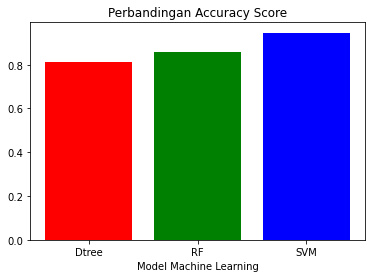

In [501]:
x = [0, 1, 2]
y = [acc_dtree, acc_rf, acc_svm]

fig, ax = plt.subplots()

ax.bar(x, y, align='center', color=['red','green', 'blue'])

ax.set_title('Perbandingan Accuracy Score')
ax.set_xlabel('Model Machine Learning')

ax.set_xticks(x)
ax.set_xticklabels(("Dtree", "RF", "SVM"))

plt.show()

Accuracy classification score

Dalam klasifikasi multilabel, fungsi ini menghitung akurasi subset: kumpulan label yang diprediksi untuk sampel harus sama persis dengan kumpulan label yang sesuai dalam y_test. 

Jadi, Support Vector machine merupakan model yang memiliki nilai tertinggi pada evaluasi dengan accurary_score

In [483]:
from sklearn.metrics import precision_score #mengimport precision_score dari sklearn.metrics
pre_dtree = precision_score(y_test, y_dtree, average='macro')
pre_rf = precision_score(y_test, y_rf, average='macro')
pre_svm = precision_score(y_test, y_svm, average='macro')
print('Precision with Dtree : ',pre_dtree)
print('Precision with Rf : ',pre_rf)
print('Precision with Svm : ',pre_svm)

Precision with Dtree :  0.8173258539983252
Precision with Rf :  0.8570664202068349
Precision with Svm :  0.9465286835864329


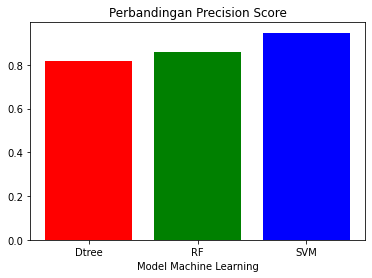

In [500]:
x = [0, 1, 2]
y = [pre_dtree, pre_rf, pre_svm]

fig, ax = plt.subplots()

ax.bar(x, y, align='center', color=['red','green', 'blue'])

ax.set_title('Perbandingan Precision Score')
ax.set_xlabel('Model Machine Learning')

ax.set_xticks(x)
ax.set_xticklabels(("Dtree", "RF", "SVM"))

plt.show()

Compute the precision

Presisi adalah rasio tp / (tp + fp) di mana tp adalah jumlah positif benar dan fp jumlah positif palsu. Presisi secara intuitif adalah kemampuan pengklasifikasi untuk tidak memberi label positif pada sampel yang negatif.

Nilai terbaik adalah 1 dan nilai terburuk adalah 0. 

Jadi, Support Vector machine merupakan model yang memiliki nilai terbaik dikarenakan nilainya mendekati 1 pada evaluasi menggunakan precision_score

In [496]:
from sklearn.metrics import recall_score #mengimport recall_score dari sklearn.metrics
rec_dtree = recall_score(y_test, y_dtree, average='macro')
rec_rf = recall_score(y_test, y_rf, average='macro')
rec_svm = recall_score(y_test, y_svm, average='macro')
print('Recall with Dtree : ',rec_dtree)
print('Recall with RF : ',rec_rf)
print('Recall with Svm : ',rec_svm)

Recall with Dtree :  0.8158404699165569
Recall with RF :  0.8602108036890646
Recall with Svm :  0.9487675669740887


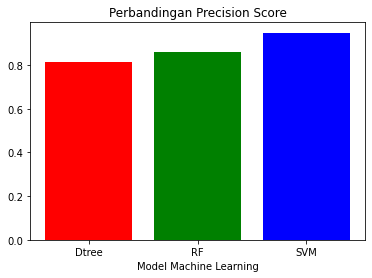

In [498]:
x = [0, 1, 2]
y = [rec_dtree, rec_rf, rec_svm]

fig, ax = plt.subplots()

ax.bar(x, y, align='center', color=['red','green', 'blue'])

ax.set_title('Perbandingan Precision Score')
ax.set_xlabel('Model Machine Learning')

ax.set_xticks(x)
ax.set_xticklabels(("Dtree", "RF", "SVM"))

plt.show()

Compute the recall

Penarikan kembali adalah rasio tp / (tp + fn) di mana tp adalah jumlah positif benar dan fn jumlah negatif palsu. Penarikan kembali secara intuitif adalah kemampuan pengklasifikasi untuk menemukan semua sampel positif.

Nilai terbaik adalah 1 dan nilai terburuk adalah 0. 

Jadi, Support Vector machine merupakan model yang memiliki nilai terbaik dikarenakan nilainya mendekati 1 pada evaluasi menggunakan recall_score

Dari hasil model yang telah dibuat, dapat disimpulkan bahwa ada beberapa faktor yang memengaruhi price_range pada smartphone, yaitu:

- battery_power
- px_height
- px_width
- ram